<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Zoomcamp-HW-2/blob/main/ML_Zoomcamp_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning ZoomCamp - Homework 2 
**Author.....: Carlos Manuel de Oliveira Alves**<br>
**Created...: 16/09/2022**

In [1]:
# Import all necessay libraries that we will use in this homework
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Using this library it reduces some minor warnings
# e.g. not having the newest version of numpy and python it will give the warning
# using the parameter ignore it will ignore the warnings
import warnings
warnings.filterwarnings("ignore")

##Load Data

In [3]:
# Create list with the columns to be used with the dataset
usecols = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

# Getting the data for the homework
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-16 18:18:39--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.008s  

2022-09-16 18:18:39 (163 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [5]:
# Store only the features we need for this homework
data = pd.read_csv('housing.csv.1', usecols=usecols)

In [8]:
# Check total of rows and columns of the dataset
print(data.shape)

(20640, 9)


In [9]:
# Check the first 10 rows of the dataset
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


###Look at the median_house_value variable. Does it have a long tail? False

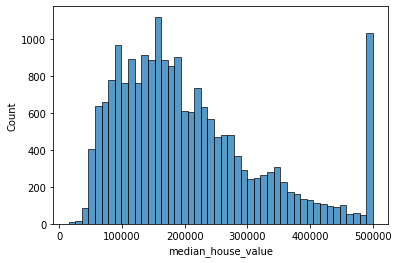

In [10]:
# Plot the histogram of median_house_value
sns.histplot(data.median_house_value)

##Question 1

**Find a feature with missing values. How many missing values does it have?**

In [11]:
# Use the function info to get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
# We have a feature called total_bedrooms has missing values

missingValues = data.isnull().sum()
missingValues

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

###Answer for Question N.1: 'total_bedrooms', 207

In [14]:
# Different method to find the missing values of the datset
incomplete = data.isna().mean()*100
print(incomplete[incomplete > 0])

# in this case the percentage of the missing values is 1%

total_bedrooms    1.002907
dtype: float64


##Question 2

**What's the median (50% percentile) for variable 'population'?**

In [13]:
medianPopulation = data['population'].median()
medianPopulation

1166.0

###Answer for Question N.2: 1166

##Split the data

In [ ]:
# Shuffle the initial dataset, use seed 42.
